In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
import torch

from finetune_rl import mouth_dataset, eyes_dataset , get_reward


c:\python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\python39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\python39\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\python39\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
c:\python39\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


ImportError: cannot import name 'mouth_dataset' from 'finetune_rl' (C:\Users\sebis\Documents\MEGA\Main documents\Sebi\Berkeley\School\Fall 2023\285\finalproj\RL-diffusion\finetune_rl.py)

In [ ]:
def sample_points_in_oval(num_points, a, b, center_x=0, center_y=0, rotation_angle=0):
    """
    Samples points inside an oval with a customizable center and a probability decreasing with distance from the origin.

    Parameters:
    num_points (int): Number of points to sample.
    a (float): Length of the major axis.
    b (float): Length of the minor axis.
    center_x (float): X-coordinate of the oval's center.
    center_y (float): Y-coordinate of the oval's center.
    rotation_angle (float): Angle of rotation of the oval in degrees. Default is 0.

    Returns:
    np.array: An array of points inside the oval.
    """

    # Rotation matrix
    theta = np.radians(rotation_angle)
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                                [np.sin(theta), np.cos(theta)]])

    # Sample points
    points = []
    while len(points) < num_points:
        x, y = np.random.uniform(-a + center_x, a + center_x), np.random.uniform(-b + center_y, b + center_y)
        distance_from_origin = np.sqrt((x - center_x)**2 + (y - center_y)**2)
        max_distance = np.sqrt(a**2 + b**2)
        probability_threshold = 1 - (distance_from_origin / max_distance)

        if ((x - center_x)**2 / a**2) + ((y - center_y)**2 / b**2) <= 1 and np.random.random() < probability_threshold:
            rotated_point = np.dot(rotation_matrix, np.array([x, y]))
            points.append(rotated_point)

    return np.array(points)

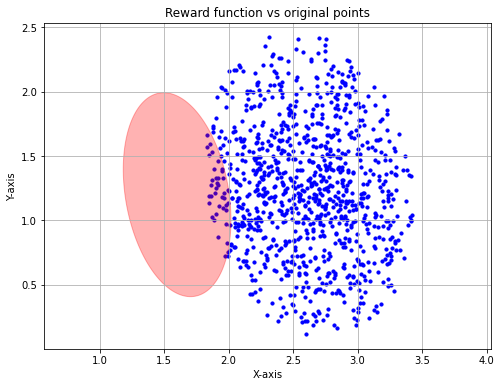

In [28]:
def plot_oval_points(num_points, a, b, center_x=0, center_y=0, rotation_angle=0, 
                     additional_oval_center=(0, 0), additional_oval_axes=(1, 1), additional_oval_rotation=0, fill_alpha=0.3):
    """
    Generates and plots points inside an oval and plots another shaded oval.

    Parameters for the point cloud oval:
    num_points (int): Number of points to sample.
    a (float): Length of the major axis.
    b (float): Length of the minor axis.
    center_x (float): X-coordinate of the oval's center.
    center_y (float): Y-coordinate of the oval's center.
    rotation_angle (float): Angle of rotation of the oval in degrees. Default is 0.

    Parameters for the additional shaded oval:
    additional_oval_center (tuple): Center (x, y) of the additional oval.
    additional_oval_axes (tuple): Major and minor axes (a, b) of the additional oval.
    additional_oval_rotation (float): Rotation angle in degrees of the additional oval.
    fill_alpha (float): Transparency level for shading the additional oval.
    """
    # Sample points for the point cloud oval
    points = sample_points_in_oval(num_points, a, b, center_x, center_y, rotation_angle)

    # Parametric equations for the additional oval
    t = np.linspace(0, 2*np.pi, 500)
    ox, oy = additional_oval_center
    oa, ob = additional_oval_axes
    theta = np.radians(additional_oval_rotation)
    cos_theta, sin_theta = np.cos(theta), np.sin(theta)

    x_oval = ox + oa * np.cos(t) * cos_theta - ob * np.sin(t) * sin_theta
    y_oval = oy + oa * np.cos(t) * sin_theta + ob * np.sin(t) * cos_theta

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.scatter(points[:, 0], points[:, 1], color='blue', s=10)  # Point cloud oval
    plt.fill(x_oval, y_oval, color='red', alpha=fill_alpha)  # Shaded additional oval
    plt.axis([-6, 6, -6, 6]);
    plt.axis('equal')
    plt.title("Reward function vs original points")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.grid(True)
    plt.show()

# Example usage
plot_oval_points(1000, 0.2*4, 0.3*4, center_x=0.7*4, center_y=0.2*4, rotation_angle=10, 
                 additional_oval_center=(0.4*4, 0.3*4), additional_oval_axes=(0.1*4, 0.2*4), additional_oval_rotation=10)

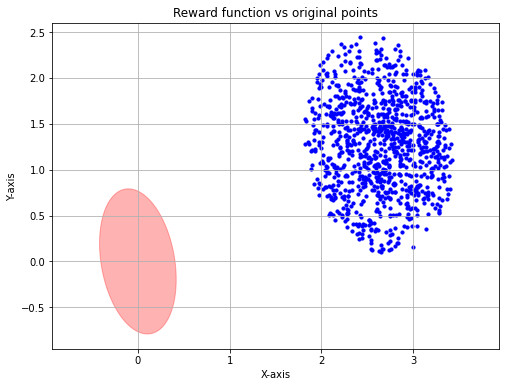

In [29]:
plot_oval_points(1000, 0.2*4, 0.3*4, center_x=0.7*4, center_y=0.2*4, rotation_angle=10, 
                 additional_oval_center=(0*4, 0*4), additional_oval_axes=(0.1*4, 0.2*4), additional_oval_rotation=10)

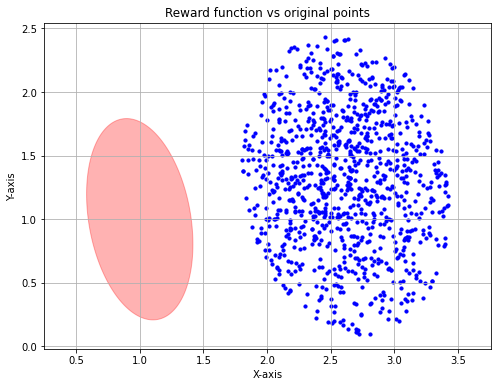

In [30]:
plot_oval_points(1000, 0.2*4, 0.3*4, center_x=0.7*4, center_y=0.2*4, rotation_angle=10, 
                 additional_oval_center=(0.25*4, 0.25*4), additional_oval_axes=(0.1*4, 0.2*4), additional_oval_rotation=10)

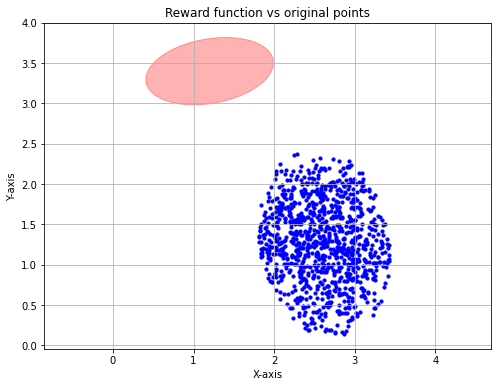

In [31]:
plot_oval_points(1000, 0.2*4, 0.3*4, center_x=0.7*4, center_y=0.2*4, rotation_angle=10, 
                 additional_oval_center=(0.3*4, 0.85*4), additional_oval_axes=(0.2*4, 0.1*4), additional_oval_rotation=10)

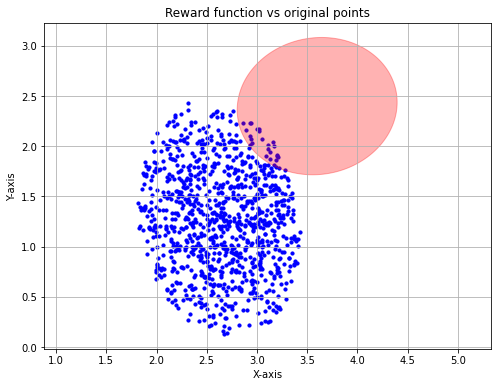

In [32]:
plot_oval_points(1000, 0.2*4, 0.3*4, center_x=0.7*4, center_y=0.2*4, rotation_angle=10, 
                 additional_oval_center=(0.9*4, 0.6*4), additional_oval_axes=(0.2*4, 0.17*4), additional_oval_rotation=10)

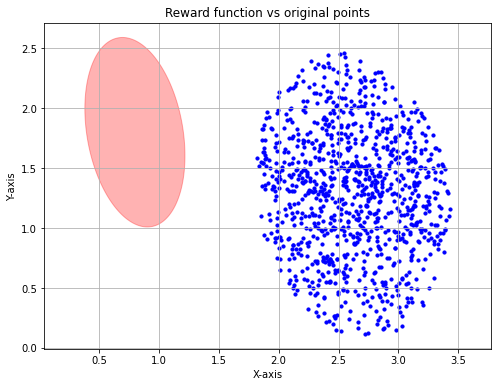

In [34]:
plot_oval_points(1000, 0.2*4, 0.3*4, center_x=0.7*4, center_y=0.2*4, rotation_angle=10, 
                 additional_oval_center=(0.2*4, 0.45*4), additional_oval_axes=(0.1*4, 0.2*4), additional_oval_rotation=10)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

c:\python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\python39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\python39\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\python39\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
c:\python39\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

def plot_func(f, points, save_to=None):
    # Create a meshgrid for x and y values
    x = np.linspace(-6, 6, 100)
    y = np.linspace(-6, 6, 100)
    X, Y = np.meshgrid(x, y)

    # Compute Z values
    Z = f(X, Y)

    # Plotting
    plt.figure()
    cp = plt.contourf(X, Y, Z, 50, cmap='viridis')  # 50 levels of contour
    plt.colorbar(cp)  # Add a colorbar to a plot
    plt.scatter(points[:, 0], points[:, 1], color='red', s=1, alpha=0.3) # Point cloud
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.title('2D Color Plot of f(x, y)')
    if save_to is not None:
        plt.savefig(save_to)
        plt.close()
    else:
        plt.show()

def plot_reward(rewards):
    plt.figure(figsize=(10, 6))
    x_values = np.arange(len(rewards)) * 5
    plt.plot(x_values, rewards)
    plt.title('Reward Plot')
    plt.xlabel('Index')
    plt.ylabel('Reward')
    plt.grid(True)
    plt.show()

def plot_loss(rewards):
    plt.figure(figsize=(10, 6))
    plt.plot(rewards)
    plt.title('Loss Plot')
    plt.xlabel('Index')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

In [5]:
from reward import get_goodness_slight_overlap, get_goodness_no_overlap, get_goodness_move_up, get_goodness_almost_overlap, get_goodness_almost_overlap_step, get_goodness_almost_overlap_top, get_goodness_almost_overlap_right

In [6]:
def make_gif(frames, func, exp_name):
    images = []
    for i in range(len(frames)):
        if i % 5 != 0:
            continue
        print(f"{i}/{len(frames)}")
        plot_func(func, frames[i], save_to=f'tmp/frame_{i}.png')
        images.append(imageio.imread(f'tmp/frame_{i}.png'))
    imageio.mimsave("gifs/" + exp_name+'.gif', images, duration=2)  # fps is frames per second

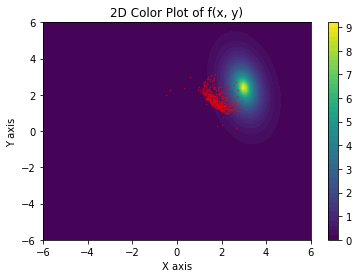

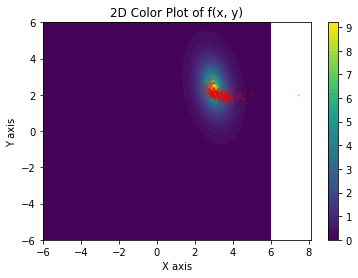

0/41


<ipython-input-6-75db250b7efc>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f'tmp/frame_{i}.png'))


5/41
10/41
15/41
20/41
25/41
30/41
35/41
40/41


In [13]:
frames = np.load('exps/almost_overlap5/frames.npy')
plot_func(get_goodness_almost_overlap_right, frames[0])
plot_func(get_goodness_almost_overlap_right, frames[-1])
make_gif(frames, get_goodness_almost_overlap_right, "almost_overlap5")

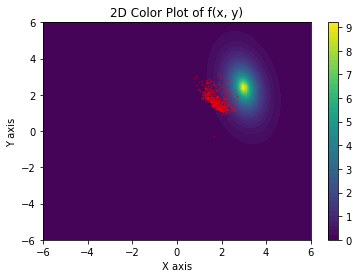

In [7]:
frames = np.load('exps/sanity/frames.npy')
plot_func(get_goodness_almost_overlap_right, frames[0])

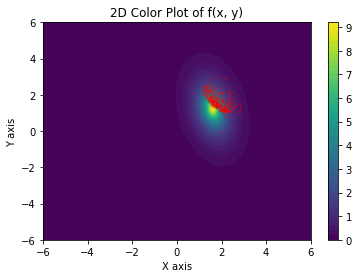

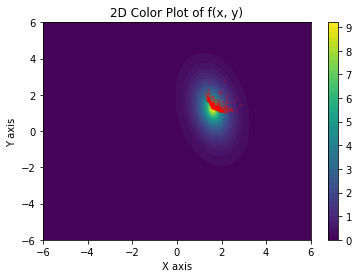

0/41


<ipython-input-38-75db250b7efc>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f'tmp/frame_{i}.png'))


5/41
10/41
15/41
20/41
25/41
30/41
35/41
40/41


In [39]:
frames = np.load('exps/no_overlap/frames.npy')
plot_func(get_goodness_slight_overlap, frames[0])
plot_func(get_goodness_slight_overlap, frames[-1])
make_gif(frames, get_goodness_slight_overlap, "no_overlap")

In [40]:
frames = np.load('exps/slight_overlap2/frames.npy')
plot_func(get_goodness_slight_overlap, frames[0])
plot_func(get_goodness_slight_overlap, frames[-1])
make_gif(frames, get_goodness_slight_overlap, "slight_overlap2")

KeyboardInterrupt: 

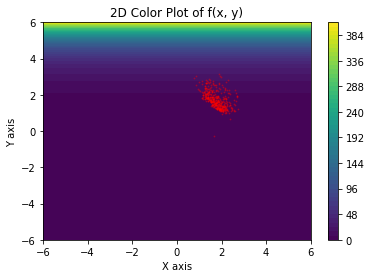

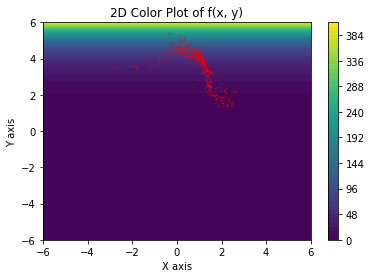

0/41


<ipython-input-38-75db250b7efc>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f'tmp/frame_{i}.png'))


5/41
10/41
15/41
20/41
25/41
30/41
35/41
40/41


In [41]:
frames = np.load('exps/sanity/frames.npy')
plot_func(get_goodness_move_up, frames[0])
plot_func(get_goodness_move_up, frames[-1])
make_gif(frames, get_goodness_move_up, "sanity")

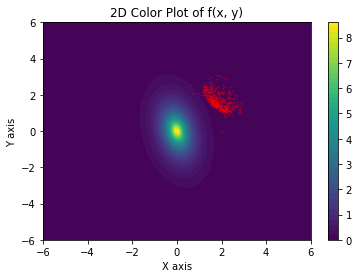

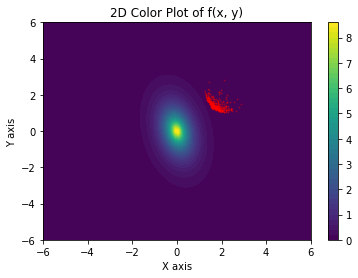

In [43]:
frames = np.load('exps/no_overlap/frames.npy')
plot_func(get_goodness_no_overlap, frames[0])
plot_func(get_goodness_no_overlap, frames[-1])
#make_gif(frames, get_goodness_move_up, "sanity")

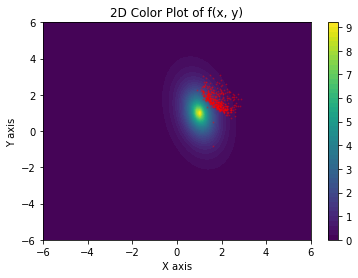

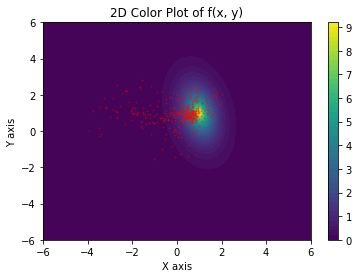

0/41


<ipython-input-7-75db250b7efc>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f'tmp/frame_{i}.png'))


5/41
10/41
15/41
20/41
25/41
30/41
35/41
40/41


In [8]:
frames = np.load('exps/almost_overlap/frames.npy')
plot_func(get_goodness_almost_overlap, frames[0])
plot_func(get_goodness_almost_overlap, frames[-1])
make_gif(frames, get_goodness_almost_overlap, "almost_overlap")

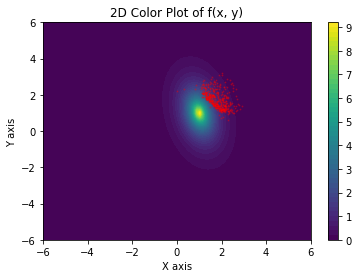

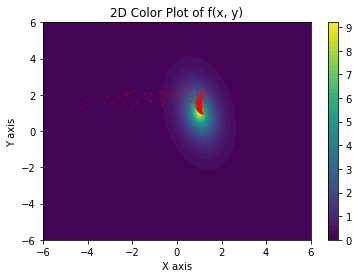

0/201


<ipython-input-7-75db250b7efc>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f'tmp/frame_{i}.png'))


5/201
10/201
15/201
20/201
25/201
30/201
35/201
40/201
45/201
50/201
55/201
60/201
65/201
70/201
75/201
80/201
85/201
90/201
95/201
100/201
105/201
110/201
115/201
120/201
125/201
130/201
135/201
140/201
145/201
150/201
155/201
160/201
165/201
170/201
175/201
180/201
185/201
190/201
195/201
200/201


In [9]:
frames = np.load('exps/almost_overlap2/frames.npy')
plot_func(get_goodness_almost_overlap, frames[0])
plot_func(get_goodness_almost_overlap, frames[-1])
make_gif(frames, get_goodness_almost_overlap, "almost_overlap2")

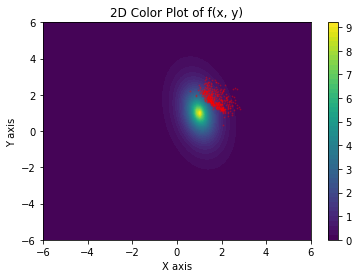

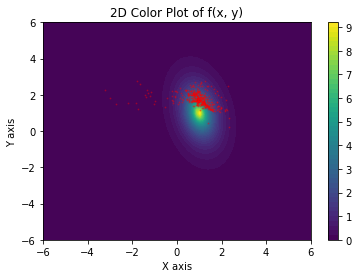

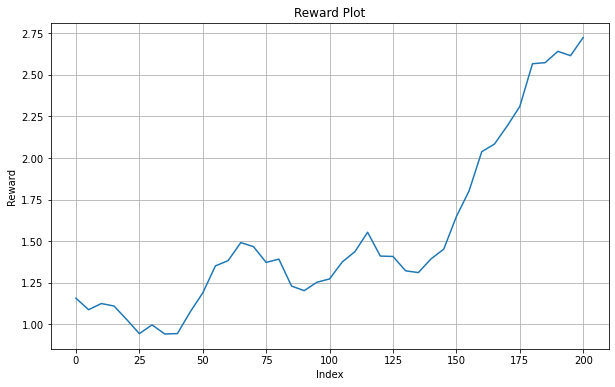

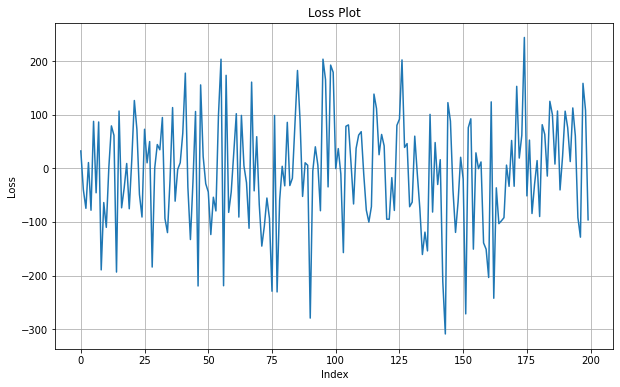

In [30]:
frames = np.load('exps/almost_overlap3/frames.npy')
loss = np.load('exps/almost_overlap3/loss.npy')
rewards = np.load('exps/almost_overlap3/reward.npy')
plot_func(get_goodness_almost_overlap, frames[0])
plot_func(get_goodness_almost_overlap, frames[-1])
plot_reward(rewards)
plot_loss(loss)

Progress: 0.0%
Progress: 5.0%
Progress: 10.0%
Progress: 15.0%
Progress: 20.0%
Progress: 25.0%
Progress: 30.0%
Progress: 35.0%
Progress: 40.0%
Progress: 45.0%
Progress: 50.0%
Progress: 55.0%
Progress: 60.0%
Progress: 65.0%
Progress: 70.0%
Progress: 75.0%
Progress: 80.0%
Progress: 85.0%
Progress: 90.0%
Progress: 95.0%


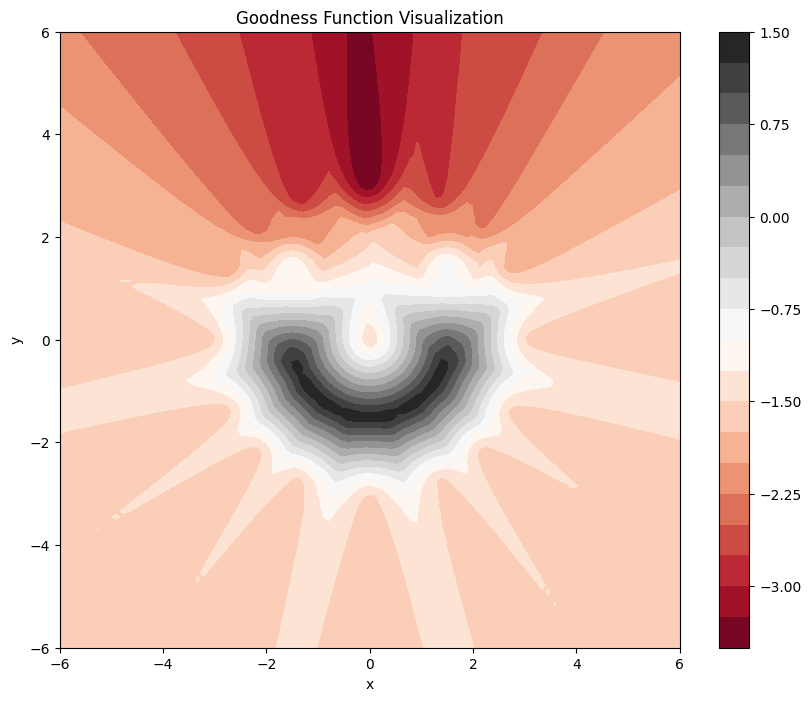

In [7]:
# Create a grid of x and y values
x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x, y)

# Initialize an array for storing results
Z = np.zeros_like(X)

# Compute goodness for each point in the grid
for i, yi in enumerate(y):
    for j, xi in enumerate(x):
        Z[i, j] = get_reward(xi, yi)
    # Print progress every 10 steps
    if i % 5 == 0:
        print(f"Progress: {i/len(y)*100:.1f}%")

# Create a contour plot
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()
plt.title('Goodness Function Visualization')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [9]:
mouth_dataset()

array([[ 2.9630098 , -0.05890843],
       [-0.03220458,  3.036226  ],
       [ 2.6857004 , -1.3249294 ],
       ...,
       [-0.170813  , -1.4902426 ],
       [-0.8733669 , -1.2195206 ],
       [-0.04362394, -1.4993656 ]], dtype=float32)

In [1]:
import json

# Function to load JSON data from a file
def load_json(filename):
    with open(filename, 'r') as file:
        data = json.load(file)
    return data

# Load the data from 'trajs.json'
traj_data = load_json('trajs.json')

In [8]:
trajectory_length = len(traj_data[0]["observation"])
trajectory_count = len(traj_data)

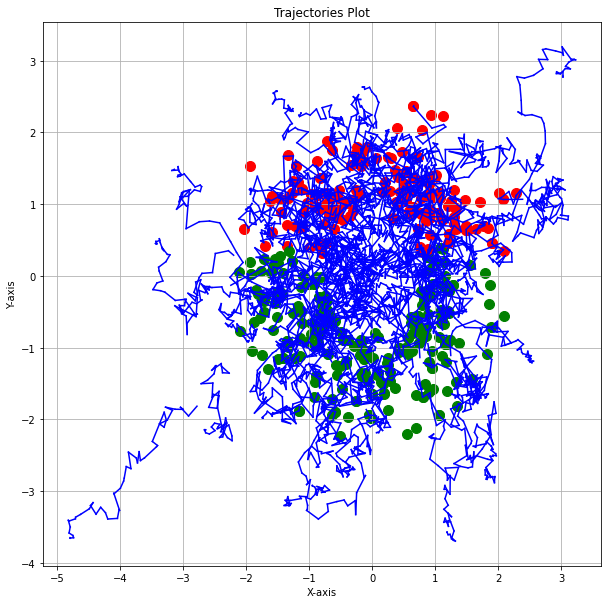

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))  # Set the size of the plot

for traj_idx in range(trajectory_count):
    if traj_idx > 100:
        continue
    for timestep in range(trajectory_length):
        obs = traj_data[traj_idx]["observation"][timestep]
        next_obs = traj_data[traj_idx]["next_obersation"][timestep]
        action = traj_data[traj_idx]["action"][timestep]
        reward = traj_data[traj_idx]["reward"][timestep]

        # Plot a line segment between obs and next_obs
        plt.plot([obs[0], next_obs[0]], [obs[1], next_obs[1]], color='blue')
        
        if reward != 0:
            color = 'green' if reward > 0 else 'red'
            plt.scatter(*next_obs, color=color, s=100)  # s is the size of the marker

for traj_idx in range(trajectory_count):
    if traj_idx > 500:
        continue
    for timestep in range(trajectory_length):
        obs = traj_data[traj_idx]["observation"][timestep]
        next_obs = traj_data[traj_idx]["next_obersation"][timestep]
        action = traj_data[traj_idx]["action"][timestep]
        reward = traj_data[traj_idx]["reward"][timestep]

        # Plot a line segment between obs and next_obs
        
        if reward != 0:
            color = 'green' if reward > 0 else 'red'
            plt.scatter(*next_obs, color=color, s=100)  # s is the size of the marker

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Trajectories Plot')
plt.grid(True)
plt.show()